In [1]:
!pip install pycaret[analysis]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.7 MB/s eta 0:00:002.0 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 9.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 6.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [2]:
from pycaret import regression

In [3]:
from pycaret.datasets import get_data
dataset = get_data("diamond")

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [4]:
dataset = get_data("diamond", profile=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
data = dataset.sample(frac=0.9, random_state=786)

In [6]:
data_unseen = dataset.drop(data.index)

In [7]:
data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

In [8]:
print("Data for Modeling " + str(data.shape))

Data for Modeling (5400, 8)


In [9]:
print("Unseen Data for Prediction " + str(data_unseen.shape))

Unseen Data for Prediction (600, 8)


### Preprocessing

In [10]:
experiment = regression.setup(data = data,
                 target = "Price",
                 session_id = 123,
                 normalize = True,
                 transformation = True,
                 transform_target = True,                 
                 remove_multicollinearity = True,
                 multicollinearity_threshold = 0.95,
                 bin_numeric_features = ["Carat Weight"],
                 log_experiment = False,
                 experiment_name = "diamond1")
                 

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(5400, 8)"
4,Transformed data shape,"(5400, 28)"
5,Transformed train set shape,"(3779, 28)"
6,Transformed test set shape,"(1621, 28)"
7,Ordinal features,1
8,Numeric features,1
9,Categorical features,6


In [11]:
best_model = regression.compare_models(exclude = ["lightgbm"])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1707.9544,5903344.1271,2417.2365,0.9413,0.2225,0.1887,0.1950
rf,Random Forest Regressor,1741.3787,7137302.0316,2652.7687,0.9301,0.2402,0.1914,0.3050
et,Extra Trees Regressor,1899.5518,8861962.0801,2964.1057,0.9123,0.2605,0.2042,0.3240
dt,Decision Tree Regressor,1917.2621,9348381.9398,3041.8356,0.9078,0.2611,0.2045,0.1160
huber,Huber Regressor,2459.0362,13448255.4580,3652.8315,0.8665,0.2773,0.2450,0.1670
ridge,Ridge Regression,2525.0260,13756677.3170,3694.6290,0.8634,0.2745,0.2399,0.1570
lr,Linear Regression,2525.0683,13779965.9350,3697.4189,0.8631,0.2748,0.2400,0.6000
br,Bayesian Ridge,2528.8946,13826571.0344,3703.9074,0.8627,0.2745,0.2399,0.1110
ada,AdaBoost Regressor,2708.1303,25054664.8993,4936.7017,0.7588,0.2920,0.2256,0.1820
omp,Orthogonal Matching Pursuit,3038.6247,31316066.5606,5534.5784,0.6968,0.3329,0.2650,0.1180


In [12]:
tuned_best = regression.tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1679.0225,5267570.3128,2295.1188,0.9422,0.2189,0.1822
1,1966.8693,12919474.9145,3594.3671,0.9010,0.2313,0.1945
2,1836.1748,7936481.8015,2817.1762,0.9272,0.2408,0.2054
3,1679.5022,5620524.0428,2370.7644,0.9380,0.2139,0.1786
4,1723.3571,5921593.8542,2433.4325,0.9261,0.2317,0.1982
5,1904.1648,13019205.0876,3608.2136,0.8889,0.2263,0.1933
6,1849.4508,8032177.3277,2834.1096,0.9245,0.2285,0.1930
7,1364.8422,4934572.8565,2221.3898,0.9376,0.1954,0.1531
8,1799.9373,7083354.7602,2661.4573,0.9304,0.2253,0.1871


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [13]:
model = regression.create_model("dt")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1924.4656,8736131.7449,2955.6948,0.9041,0.2668,0.2041
1,1980.1004,12538181.9475,3540.9295,0.9039,0.2646,0.2041
2,1912.0015,8982930.8341,2997.1538,0.9176,0.2651,0.2165
3,1923.1600,8364765.4873,2892.1904,0.9077,0.2507,0.1954
4,1945.9234,8658428.0843,2942.5207,0.8920,0.2634,0.2157
5,2020.7376,11914427.8011,3451.7282,0.8983,0.2598,0.2096
6,1939.6026,8723092.9019,2953.4883,0.9180,0.2619,0.1962
7,1485.4546,5583419.3599,2362.9260,0.9294,0.2226,0.1659
8,1997.2631,9908416.9058,3147.7638,0.9027,0.2708,0.2056


In [14]:
import numpy as np

params = {
    # "n_neighbors": np.arange(2, 11, 2),
    # "leaf_size": np.arange(10,40, 5)
}

tuned_model = regression.tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2929.8586,26840608.1029,5180.7922,0.7053,0.2901,0.2413
1,3138.3015,51647359.2091,7186.6097,0.6042,0.3049,0.2336
2,3083.0764,35906522.3643,5992.2051,0.6707,0.3053,0.2545
3,2822.5247,23523918.8485,4850.1463,0.7405,0.2880,0.2289
4,2668.1829,22006855.6840,4691.1465,0.7255,0.2889,0.2409
5,2858.9299,38058652.9874,6169.1696,0.6752,0.2907,0.2383
6,3081.1326,31938357.6425,5651.4032,0.6999,0.3088,0.2508
7,2563.3202,18627752.1400,4315.9880,0.7644,0.2669,0.2239
8,2704.9769,24321938.0367,4931.7277,0.7611,0.2812,0.2239


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Evaluate model

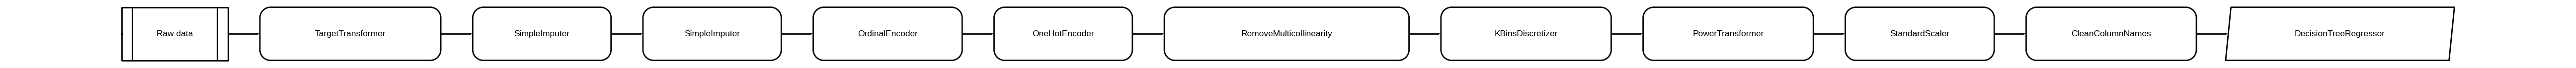

In [15]:
regression.plot_model(tuned_model, plot = "pipeline")

In [16]:
regression.plot_model(tuned_model, plot = "residuals_interactive")

    'data': [{'hovertemplate': 'Split=train<br>Predictions…

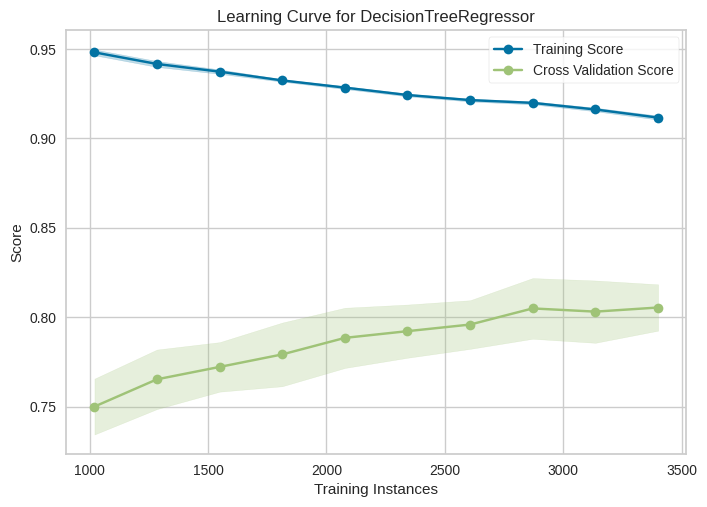

In [17]:
regression.plot_model(tuned_model, plot = "learning")


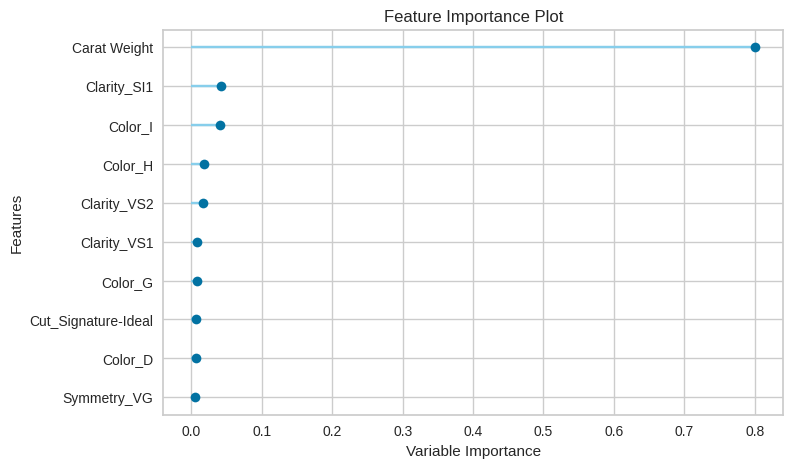

In [18]:
regression.plot_model(tuned_model, plot = "feature")

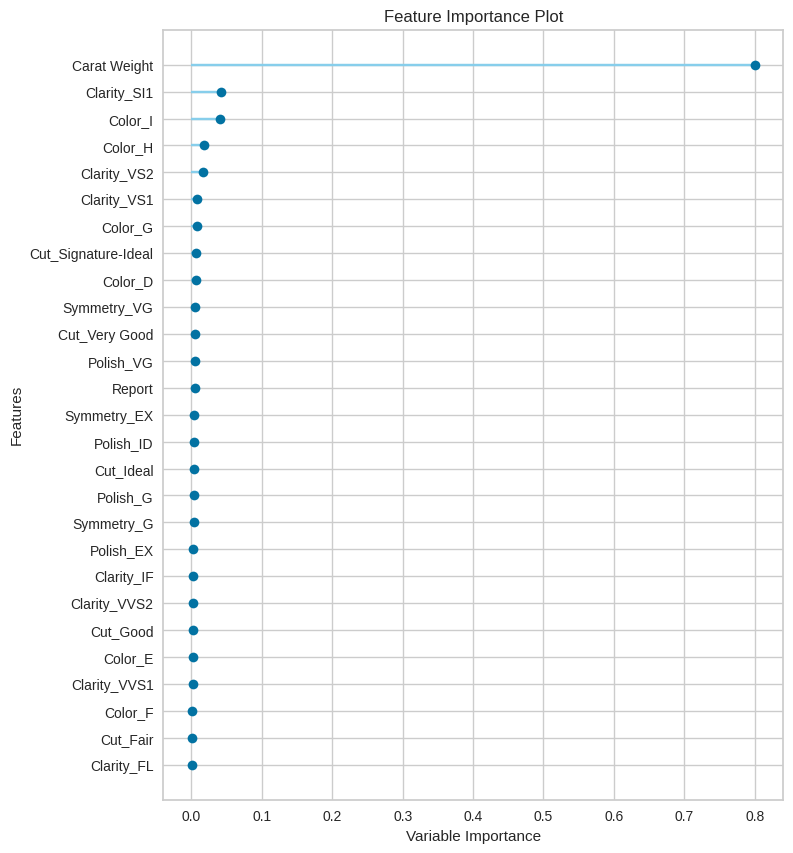

In [19]:
regression.plot_model(tuned_model, plot = "feature_all")

In [20]:
regression.plot_model(tuned_model, plot = "parameter")

,Parameters
ccp_alpha,0.0
criterion,squared_error
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0
random_state,123


In [ ]:
regression.plot_model(tuned_model, plot = "tree")

In [ ]:
regression.predict_model(tuned_best)

### Finish and Deploy

In [ ]:
final_best = regression.finalize_model(tuned_best)

In [ ]:
model_output = ".././models/diamond-pipeline"
regression.save_model(final_best, model_output)

### Production

In [ ]:
model = regression.load_model(model_output)

In [ ]:
predictions = regression.predict_model(model, data=data_unseen)

In [ ]:
predictions.head()

### Metrics


In [ ]:
from pycaret.utils.generic import check_metric

In [ ]:
check_metric(predictions.Price, predictions.prediction_label, "R2")